In [9]:
import pandas as pd
import datetime as dt
import numpy as np
incident = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/incidents.csv',
                       parse_dates = ['CallConfirmedDT'],dtype='unicode')
unit = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/units.csv',dtype='unicode')
patient = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/patients.csv',
                      parse_dates =['UnitTransportedDT','UnitTransportedArrivalDT'],dtype='unicode')
history = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/UnitHistory.txt',sep="|",dtype='unicode')
outservice = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/OutOfService.txt',
                         parse_dates=['OOSOutOfServiceDT', 'OOSInServiceDT'],sep=",",dtype='unicode')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [10]:
med = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/medications.csv',dtype='unicode')
pro = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/procedures.csv',dtype='unicode')

In [54]:
patient

PrimaryKey PatientID TransportUnitID   UnitTransportedDT  \
0       09804015371    640838            M401 2018-07-01 02:47:55   
1       09804016046    641032            M401 2018-07-01 11:44:54   
2       09804018610    641839            M401 2018-07-02 09:54:49   
3       09804018946    641959            M401 2018-07-02 11:41:42   
4       09804019337    642086            M401 2018-07-02 14:21:28   
...             ...       ...             ...                 ...   
125142     12358275   1436704            M437 2020-12-31 16:37:53   
125143     12358430   1436857           M409B 2020-12-31 18:47:49   
125144     12358869   1436997            M414 2020-12-31 22:17:33   
125145     12358900   1436996            M418 2020-12-31 22:26:13   
125146     12359015   1437053            M431 2020-12-31 23:45:03   

       UnitTransportedArrivalDT                    TransportLOC  \
0           2018-07-01 03:06:39  Level 3: 1 Provider (ALS Care)   
1           2018-07-01 11:55:05  Level 4: 1 Provider (BLS Care)   
2           2018-07-02 10:08:54  Level 4: 1 Provider (BLS Care)   
3           2018-07-02 12:08:36  Level 4: 1 Provider (BLS Care)   
4           2018-07-02 14:33:41  Level 3: 1 Provider (ALS Care)   
...                         ...                             ...   
125142      2020-12-31 16:47:10  Level 4: 1 Provider (BLS Care)   
125143      2020-12-31 18:55:24  Level 3: 1 Provider (ALS Care)   
125144      2020-12-31 22:31:28  Level 3: 1 Provider (ALS Care)   
125145      2020-12-31 22:32:30  Level 4: 1 Provider (BLS Care)   
125146      2020-12-31 23:56:22  Level 3: 1 Provider (ALS Care)   

       TransportHospitalCode                  TransportHospitalName  \
0                          3               Virginia Hospital Center   
1                          3               Virginia Hospital Center   
2                         16                       Fairfax Hospital   
3                          3               Virginia Hospital Center   
4                          3               Virginia Hospital Center   
...                      ...                                    ...   
125142                    47                  Mount Vernon Hospital   
125143                    47                  Mount Vernon Hospital   
125144                    16                       Fairfax Hospital   
125145                   202  Inova Emergency Care Center - Fairfax   
125146                    95                 Reston Hospital Center   

                                          ReasonForChoosingHospital  \
0                                 Patient's Choice,Closest Facility   
1                                                  Patient's Choice   
2                                                  Closest Facility   
3       Closest Facility,Family Choice,Patient's Physician's Choice   
4                     Closest Facility,Patient's Physician's Choice   
...                                                             ...   
125142                                             Closest Facility   
125143                                             Closest Facility   
125144                                             Closest Facility   
125145                                             Closest Facility   
125146                                             Closest Facility   

       PatientAge  \
0         80 - 89   
1         80 - 89   
2         40 - 49   
3         80 - 89   
4         20 - 29   
...           ...   
125142    60 - 69   
125143    30 - 39   
125144    60 - 69   
125145    20 - 29   
125146    10 - 19   

                                                      PrimaryImpression  \
0                                GI/GU - Nausea (With Vomiting) (R11.2)   
1                              EENT - Eye Pain (Non-traumatic) (H57.10)   
2                                                Injury - Foot (S99.92)   
3                                                 Injury - Hip (S79.91)   
4       Neuro - Altered Mental Status / L

In [12]:
new_sp = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/MasterData_Restructured4.txt',sep="|",dtype='unicode')

In [13]:
sp = pd.read_csv('/Users/phuriwatnitikunchainun/secondprovider.csv',dtype='unicode')

In [14]:
count_patient=patient.groupby(['PrimaryKey'])['PatientID'].count().to_frame('Count # of PatientID').reset_index()

In [15]:
new_sp

Unnamed: 0   PrimaryKey CallDTMonth CallDTHour CallDTDayofWeek  \
0               0   9804095125           7          0               6   
1               1   9804225142           7          0               6   
2               2   9804225144           7          0               6   
3               3   9804105181           7          0               6   
4               4   9804085219           7          0               6   
...           ...          ...         ...        ...             ...   
122640     122644  12354409006          12         23               3   
122641     122645     12359015          12         23               3   
122642     122646  12354219030          12         23               3   
122643     122647  12354449085          12         23               3   
122644     122648  12354229090          12         23               3   

       IncidentFirstDue_401.0 IncidentFirstDue_402.0 IncidentFirstDue_403.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
122640                      0                      0                      0   
122641                      0                      0                      0   
122642                      0                      0                      0   
122643                      0                      0                      0   
122644                      0                      0                      0   

       IncidentFirstDue_404.0 IncidentFirstDue_405.0 IncidentFirstDue_408.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      1   
...                       ...                    ...                    ...   
122640                      0                      0                      0   
122641                      0                      0                      0   
122642                      0                      0                      0   
122643                      0                      0                      0   
122644                      0                      0                      0   

       IncidentFirstDue_409.0 IncidentFirstDue_410.0 IncidentFirstDue_411.0  \
0                           1                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      1                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
122640                      0                      0                      0   
122641                      0                      0                      0   
122642                      0                      0                      0   
122643                      0                      0                      0   
122644                      0                      0                      0   

       IncidentFirstDue_412.0 IncidentFirstDue_413.0 IncidentFirstDue_414.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                 

In [16]:
sp=sp[['PrimaryKey','is_SecondProvider']]

In [17]:
df=new_sp.merge(count_patient,on='PrimaryKey')

In [18]:
df

Unnamed: 0   PrimaryKey CallDTMonth CallDTHour CallDTDayofWeek  \
0            8662  10004310006           9          9               0   
1            8663  10004170002           9          9               0   
2            8664  10004220071           9          9               0   
3            8665  10004240080           9          9               0   
4            8666  10004100081           9          9               0   
...           ...          ...         ...        ...             ...   
113979     122644  12354409006          12         23               3   
113980     122645     12359015          12         23               3   
113981     122646  12354219030          12         23               3   
113982     122647  12354449085          12         23               3   
113983     122648  12354229090          12         23               3   

       IncidentFirstDue_401.0 IncidentFirstDue_402.0 IncidentFirstDue_403.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
113979                      0                      0                      0   
113980                      0                      0                      0   
113981                      0                      0                      0   
113982                      0                      0                      0   
113983                      0                      0                      0   

       IncidentFirstDue_404.0 IncidentFirstDue_405.0 IncidentFirstDue_408.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
113979                      0                      0                      0   
113980                      0                      0                      0   
113981                      0                      0                      0   
113982                      0                      0                      0   
113983                      0                      0                      0   

       IncidentFirstDue_409.0 IncidentFirstDue_410.0 IncidentFirstDue_411.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      1                      0   
...                       ...                    ...                    ...   
113979                      0                      0                      0   
113980                      0                      0                      0   
113981                      0                      0                      0   
113982                      0                      0                      0   
113983                      0                      0                      0   

       IncidentFirstDue_412.0 IncidentFirstDue_413.0 IncidentFirstDue_414.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                 

In [19]:
df=df.merge(sp,how='left',on='PrimaryKey')
df['is_SecondProvider'] = df['is_SecondProvider'].fillna(False)

In [20]:
new_list=[]
for i in df['is_SecondProvider']:
    if i =='True':
        new_list.append(1.0)
    if i ==False:
        new_list.append(0.0)
new_list
df['is_SecondProvider2']=new_list
df

Unnamed: 0   PrimaryKey CallDTMonth CallDTHour CallDTDayofWeek  \
0            8662  10004310006           9          9               0   
1            8663  10004170002           9          9               0   
2            8664  10004220071           9          9               0   
3            8665  10004240080           9          9               0   
4            8666  10004100081           9          9               0   
...           ...          ...         ...        ...             ...   
113979     122644  12354409006          12         23               3   
113980     122645     12359015          12         23               3   
113981     122646  12354219030          12         23               3   
113982     122647  12354449085          12         23               3   
113983     122648  12354229090          12         23               3   

       IncidentFirstDue_401.0 IncidentFirstDue_402.0 IncidentFirstDue_403.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
113979                      0                      0                      0   
113980                      0                      0                      0   
113981                      0                      0                      0   
113982                      0                      0                      0   
113983                      0                      0                      0   

       IncidentFirstDue_404.0 IncidentFirstDue_405.0 IncidentFirstDue_408.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
113979                      0                      0                      0   
113980                      0                      0                      0   
113981                      0                      0                      0   
113982                      0                      0                      0   
113983                      0                      0                      0   

       IncidentFirstDue_409.0 IncidentFirstDue_410.0 IncidentFirstDue_411.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      1                      0   
...                       ...                    ...                    ...   
113979                      0                      0                      0   
113980                      0                      0                      0   
113981                      0                      0                      0   
113982                      0                      0                      0   
113983                      0                      0                      0   

       IncidentFirstDue_412.0 IncidentFirstDue_413.0 IncidentFirstDue_414.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                 

In [21]:
df.is_SecondProvider.value_counts()

False    107821
True       6163
Name: is_SecondProvider, dtype: int64

In [22]:
df.to_csv('Final_SecondProvider.csv')

In [23]:
name=list(df.columns)
name

['Unnamed: 0',
 'PrimaryKey',
 'CallDTMonth',
 'CallDTHour',
 'CallDTDayofWeek',
 'IncidentFirstDue_401.0',
 'IncidentFirstDue_402.0',
 'IncidentFirstDue_403.0',
 'IncidentFirstDue_404.0',
 'IncidentFirstDue_405.0',
 'IncidentFirstDue_408.0',
 'IncidentFirstDue_409.0',
 'IncidentFirstDue_410.0',
 'IncidentFirstDue_411.0',
 'IncidentFirstDue_412.0',
 'IncidentFirstDue_413.0',
 'IncidentFirstDue_414.0',
 'IncidentFirstDue_415.0',
 'IncidentFirstDue_416.0',
 'IncidentFirstDue_417.0',
 'IncidentFirstDue_418.0',
 'IncidentFirstDue_419.0',
 'IncidentFirstDue_420.0',
 'IncidentFirstDue_421.0',
 'IncidentFirstDue_422.0',
 'IncidentFirstDue_423.0',
 'IncidentFirstDue_424.0',
 'IncidentFirstDue_425.0',
 'IncidentFirstDue_426.0',
 'IncidentFirstDue_427.0',
 'IncidentFirstDue_428.0',
 'IncidentFirstDue_429.0',
 'IncidentFirstDue_430.0',
 'IncidentFirstDue_431.0',
 'IncidentFirstDue_432.0',
 'IncidentFirstDue_433.0',
 'IncidentFirstDue_434.0',
 'IncidentFirstDue_435.0',
 'IncidentFirstDue_436.0',
 

In [24]:
name = [e for e in name if e in ('PrimaryKey',
'CallDTMonth',
 'CallDTHour',
 'CallDTDayofWeek',
 'IncidentFirstDue_401.0',
 'IncidentFirstDue_402.0',
 'IncidentFirstDue_403.0',
 'IncidentFirstDue_404.0',
 'IncidentFirstDue_405.0',
 'IncidentFirstDue_408.0',
 'IncidentFirstDue_409.0',
 'IncidentFirstDue_410.0',
 'IncidentFirstDue_411.0',
 'IncidentFirstDue_412.0',
 'IncidentFirstDue_413.0',
 'IncidentFirstDue_414.0',
 'IncidentFirstDue_415.0',
 'IncidentFirstDue_416.0',
 'IncidentFirstDue_417.0',
 'IncidentFirstDue_418.0',
 'IncidentFirstDue_419.0',
 'IncidentFirstDue_420.0',
 'IncidentFirstDue_421.0',
 'IncidentFirstDue_422.0',
 'IncidentFirstDue_423.0',
 'IncidentFirstDue_424.0',
 'IncidentFirstDue_425.0',
 'IncidentFirstDue_426.0',
 'IncidentFirstDue_427.0',
 'IncidentFirstDue_428.0',
 'IncidentFirstDue_429.0',
 'IncidentFirstDue_430.0',
 'IncidentFirstDue_431.0',
 'IncidentFirstDue_432.0',
 'IncidentFirstDue_433.0',
 'IncidentFirstDue_434.0',
 'IncidentFirstDue_435.0',
 'IncidentFirstDue_436.0',
 'IncidentFirstDue_437.0',
 'IncidentFirstDue_438.0',
 'IncidentFirstDue_439.0',
 'IncidentFirstDue_440.0',
 'IncidentFirstDue_441.0',
 'IncidentFirstDue_442.0',
 'IncidentFirstDue_444.0',
 'IncidentFirstDue_Outside Fairfax',
 'InitialIncidentType_ACCIBF',
 'InitialIncidentType_ACCIF',
 'InitialIncidentType_ACCIHF',
 'InitialIncidentType_ACCIMF',
 'InitialIncidentType_ACCITF',
 'InitialIncidentType_ACOD',
 'InitialIncidentType_ALRMFD',
 'InitialIncidentType_ALS',
 'InitialIncidentType_AMED',
 'InitialIncidentType_ASLTWF',
 'InitialIncidentType_BLAST',
 'InitialIncidentType_BLS',
 'InitialIncidentType_CAVEIN',
 'InitialIncidentType_CODE1',
 'InitialIncidentType_CPRF',
 'InitialIncidentType_DROWNF',
 'InitialIncidentType_ECOD',
 'InitialIncidentType_ELEV',
 'InitialIncidentType_EMETROF',
 'InitialIncidentType_FACCIF',
 'InitialIncidentType_FBLDG',
 'InitialIncidentType_FDACCF',
 'InitialIncidentType_FDACCIF',
 'InitialIncidentType_FDACCIMF',
 'InitialIncidentType_FDACCITF',
 'InitialIncidentType_FGAPT',
 'InitialIncidentType_FHIRIS',
 'InitialIncidentType_FHOU',
 'InitialIncidentType_FOUT',
 'InitialIncidentType_FTH',
 'InitialIncidentType_FTRKF',
 'InitialIncidentType_FVEHF',
 'InitialIncidentType_GASIN',
 'InitialIncidentType_GASOUT',
 'InitialIncidentType_GFRESCUE',
 'InitialIncidentType_HAZMAT',
 'InitialIncidentType_INVF',
 'InitialIncidentType_LOCKF',
 'InitialIncidentType_ODF',
 'InitialIncidentType_PSERVF',
 'InitialIncidentType_RESCUE',
 'InitialIncidentType_RIVERF',
 'InitialIncidentType_RSWIFT',
 'InitialIncidentType_RTRAP',
 'InitialIncidentType_SHOTF',
 'InitialIncidentType_SIG1F',
 'InitialIncidentType_STABF',
 'InitialIncidentType_STILALRM',
 'InitialIncidentType_SUIAF',
 'InitialIncidentType_SYSIN',
 'InitialIncidentType_WIRES','unit_action_Incident command - Group/Division',
 'unit_station_1',
 'unit_station_2',
 'unit_station_4',
 'unit_station_5',
 'unit_station_8',
 'unit_station_9',
 'unit_station_10',
 'unit_station_11',
 'unit_station_12',
 'unit_station_13',
 'unit_station_14',
 'unit_station_15',
 'unit_station_16',
 'unit_station_17',
 'unit_station_18',
 'unit_station_19',
 'unit_station_20',
 'unit_station_21',
 'unit_station_22',
 'unit_station_23',
 'unit_station_24',
 'unit_station_25',
 'unit_station_26',
 'unit_station_27',
 'unit_station_28',
 'unit_station_29',
 'unit_station_30',
 'unit_station_31',
 'unit_station_32',
 'unit_station_34',
 'unit_station_35',
 'unit_station_36',
 'unit_station_37',
 'unit_station_38',
 'unit_station_39',
 'unit_station_40',
 'unit_station_41',
 'unit_station_42',
'patient_age_1 - 9',
 'patient_age_10 - 19',
 'patient_age_100 - 120',
 'patient_age_20 - 29',
 'patient_age_30 - 39',
 'patient_age_40 - 49',
 'patient_age_50 - 59',
 'patient_age_60 - 69',
 'patient_age_70 - 79',
 'patient_age_80 - 89',
 'patient_age_90 - 99',
 'patient_age_< 1',
 'impression_Injury - Head with L.O.C. (S06.0X9A)',
 'impression_GI/GU - Appendicitis Acute Onset (K35.80)',
 'impression_Newborn Care - Post-term  (P08.21)',
 'impression_CV - Pulmonary Embolism (I26)',
 'impression_Infectious - SARS (B97.21)',
 'impression_Respiratory - Smoke Inhalation (J70.5)',
 'impression_Abuse of Sedative Hypnotic or Anxiolytic (F13)',
 'impression_GI/GU - Diarrhea (K59.1)',
 'impression_Neuro - Paraplegia (G82.20)',
 'impression_Maltreatment - Adult Neglect Suspected (T74.01)',
 'impression_Injury - Neck (S19.9)',
 'impression_GI/GU - Obesity (E66.9)',
 'impression_Edema, unspecified (R60.9)',
 'impression_Behavioral - Anxiety (F41.9)',
 'impression_Injury - Intracranial Injury Not Otherwise Specified (S06.9)',
 'impression_EENT - Foreign Body to Ear (T16)',
 'impression_Metabolic Disorder - Other (E88.9)',
 'impression_CV - STEMI of other sites, With or Without Chest Pain (I21.2)',
 'impression_Environment - Heatstroke (T67.0)',
 'impression_Newborn Care - Respiratory Distress (P22)',
 'impression_Newborn Care - Normal (Z38.2)',
 'impression_Behavioral - Suicide Attempt (T14.91)',
 'impression_Anemia (D64.9)',
 'impression_Abuse of Inhalant Substances (huffing) (F15)',
 'impression_CV - Cardiac Tamponade (I31.4)',
 'impression_OB - Childbirth Uncomplicated (O80)',
 'impression_Abuse of Alcohol (ETOH) (F10.9)',
 'impression_Abuse of Psychoactive Substance (F19)',
 'impression_Mobility - Bedridden (Z74.01)',
 'impression_Respiratory - Asthma Exacerbation (J45.901)',
 'impression_Neuro - Quadriplegia (G82.50)',
 'impression_Respiratory - Distress Due to Chemicals Gases Fumes or Vapors (J68.9)',
 'impression_Respiratory - Acute Distress/ Breathing Difficulty (J80)',
 'impression_Pain - Not Elsewhere Mentioned Sudden Onset (G89.1)',
 'impression_Injury - Epidural Hemorrhage from Trauma (S06.4)',
 'impression_OB - Preterm Labor with Delivery (O60.1)',
 'impression_Respiratory - Bronchospasm Acute Onset (J98.01)',
 'impression_Neuro - TIA (transient ischemic attack) (G45.9)',
 'impression_Injury - Lung Hemothorax - Traumatic (S27.1)',
 'impression_OB - Spontaneous Rupture of Membranes (SROM) (O42.02)',
 'impression_GI/GU - Nausea (With Vomiting) (R11.2)',
 'impression_GI/GU - Foreign Body Genitourinary Tract (T19.9)',
 'impression_GI/GU - GI Problem Not Otherwise Listed (K92.9)',
 'impression_Respiratory - Foreign Body Airway (T17.9)',
 'impression_Cancer (D49)',
 'impression_Newborn Care - Care Not otherwise Listed (P15)',
 'impression_Infectious - Encephalitis or Encephalomyelitis (G04.90)',
 'impression_Malaise (R53.81)',
 'impression_Respiratory - Arrest/Apnea (R06.81)',
 'impression_Lab - Hyperkalemia (E87.5)',
 'impression_Respiratory - Hyperventialtion (R06.4)',
 'impression_Endocrine Disorder - Otherwise Not Listed (E34.9)',
 'impression_Infectious - Influenza (Flu Like Symptoms) (J11)',
 'impression_Fever (R50.9)',
 'impression_Syncope - Syncopal/Fainting Episode (or Near) (R55)',
 'impression_Injury - Not Otherwise Listed (T14.90)',
 'impression_Injury - Wrist Hand or Fingers (S69.9)',
 'impression_EENT - Eye Pain (Non-traumatic) (H57.10)',
 'impression_Dental/Tooth Pain (K08.8)',
 'impression_Injury - Elbow (S59.90)',
 'impression_CV - Hypertension (I10)',
 'impression_Abuse of Cocaine (F14)',
 'impression_Environment - Hypothermia (T68)',
 'impression_OB - Spontaneous Abortion (Miscarriage) (O03)',
 'impression_Respiratory - Pulmonary Edema Acute Onset (J81.0)',
 'impression_Burn - Unspecified Degree (T30.0)',
 'impression_Environment - Frostbite With Tissue Necrosis (T34.90)',
 'impression_Infectious - Epiglottitis (J05.1)',
 'impression_Injury - Head without L.O.C. (S06.0X0A)',
 'impression_Respiratory - COPD Exacerbation (J44.1)',
 'impression_Abuse of Alcohol - Intoxication (F10.92)',
 'impression_Injury - Subarachnoid Hemorrhage from Trauma (S06.6)',
 'impression_Abuse of Alcohol (ETOH) - Intoxication (F10.92)',
 'impression_Respiratory - Not Otherwise Listed (J98.9)',
 'impression_Injury - Ankle (S99.91)',
 'impression_Newborn Care - Pre-Term (P07.3)',
 'impression_Endocrine - Hyperglycemia - Diabetic (E13.65)',
 'impression_Behavioral - Hallucination - Visual (R44.1)',
 'impression_Injury - Forearm (S59.91)',
 'impression_Abuse of Alcohol (ETOH) - Withdrawal (F10.239)',
 'impression_CV - Abdominal Aortic Aneurysm (I71.9)',
 'impression_Environment - Toxic Exposure (Accidental) (T65.91)',
 'impression_GI Bleed - Hematemesis (Bloody Vomit) (K92.0)',
 'impression_Dehydration (E86.0)',
 'impression_Environment - Suspected Exposure to a Health Hazard (Z77.9)',
 'impression_Respiratory - COPD (Emphysema/Chronic Bronchitis) Exacerbation (J44.1)',
 'impression_Burn - Third degree (L55.2)',
 'impression_Neuro - Stroke/CVA (I63.9)',
 'impression_Environment - Heat Exhaustion/Stroke (T67.5)',
 'impression_GI Bleed - Melena (Bloody Stool) (K92.1)',
 'impression_CV - Congestive Heart Failure (CHF) (I50.9)',
 'impression_OB- OB/GYN Complaint Not Otherwise Listed (O26.90)',
 'impression_Injury - Hip (S79.91)',
 'impression_Inhalant related disorders (F18)',
 'impression_Behavioral - Disorientation (R41.0)',
 'impression_Injury - Lower Back (S39.92)',
 'impression_GI/GU - Vaginal Bleeding (N93.9)',
 'impression_Environment - Poisonous Snake Bite (T63.0)',
 'impression_Respiratory - Acute Onset Distress (J80)',
 'impression_Maltreatment - Child Neglect Suspected (T74.02)',
 'impression_Respiratory - Distress Due to Chemicals, Gases, Fumes, or Vapors (J68.9)',
 'impression_OB - Childbirth Complicated  (O75)',
 'impression_Maltreatment - Adult Sexual Abuse/Rape Suspected (T74.21)',
 'impression_Behavioral - Mental Disorder Not Otherwise Listed (F99)',
 'impression_Infectious - Pneumonia (J18.9)',
 'impression_Infectious - Bronchitis - Acute (J20.9)',
 'impression_Injury - Abdomen (S39.91)',
 'impression_Neuro - Headache - Migraine (G43.9)',
 'impression_Environment - Effects of Air or Water Pressure (T70)',
 'impression_Injury - Lung Pneumothorax - Traumatic (S27.0)',
 'impression_CV - STEMI of other sitesWith or Without Chest Pain (I21.2)',
 'impression_EENT - Epistaxis (Non-traumatic) (R04.0)',
 'impression_Burn - Second degree (L55.1)',
 'impression_Injury - Shoulder or Upper Arm (S49.9)',
 'impression_Maltreatment - Adult Physical Abuse Suspected (T74.11)',
 'impression_Respiratory - Asphyxia/Suffocation (T71.9)',
 'impression_Respiratory - Hemoptysis (R04.2)',
 'impression_GI/GU - Foreign  Body Digestive System (T18.9)',
 'impression_Abuse of Alcohol (F10.9)',
 'impression_OB - Postpartum Hemorrhage Immediate (O72.1)',
 'impression_Environment - Toxic Exposure (Intentional) (T65.92)',
 'impression_Vertigo (R42)',
 'impression_Injury - Genitalia (S39.94)',
 'impression_Respiratory - Foreign Body / Airway Obstruction (T17.9)',
 'impression_CV - Myocardial Infarction (Non-STEMI), With or Without Chest Pain (I21.4)',
 'impression_Injury - Pelvis (S39.93)',
 'impression_Infectious - Sepsis (A41.9)',
 'impression_OB - Postpartum Hemorrhage (O72)',
 'impression_Pain - Extremity (Non-traumatic) (M79.609)',
 'impression_Abuse of Alcohol - Withdrawal (F10.239)',
 'impression_Neuro - Headache (R51)',
 'impression_Environment - Heat Exhaustion (T67.5)',
 'impression_Neuro - Unconscious (R40.20)',
 'impression_Abuse of Sedative, Hypnotic or Anxiolytic (F13)',
 'impression_Environment - Electrocution (T75.4)',
 'impression_CV - Myocardial Infarction (Non-STEMI)With or Without Chest Pain (I21.4)',
 'impression_nan',
 'impression_Environment - Stings/Venomous Bites (T63.4)',
 'impression_GI/GU - Abdominal Pain Acute Onset  (R10.0)',
 'impression_Behavioral - Suicidal/Homicidal Ideation (R45.85)',
 'impression_OB - Retained Placenta without Hemorrhage (O73.0)',
 'impression_Environment - Poisoning/Drug Ingestion (T65.9)',
 'impression_Injury - Ear (S09.91)',
 'impression_Environment - Frostbite Superficial (T33.90)',
 'impression_CV - STEMI of Anterior WallWith or Without Chest Pain (I21.0)',
 'impression_Encounter for general examination without complaint, suspected or reported (Z00)',
 'impression_Neuro - Neuro Problem Not Otherwise Listed (G99.8)',
 'impression_CV - Chest Pain - Presumed Cardiac (I20.9)',
 'impression_Pain - Back (Non-traumatic) (M54.9)',
 'impression_CV - Hypotension (I95.9)',
 'impression_Congenital Deformity (Q89.9)',
 'impression_Anaphylactic Shock (T78.2)',
 'impression_OB - Pre-eclampsia (O14.9)',
 'impression_Behavioral - Depression (F32.9)',
 'impression_Injury - Thigh (upper leg) (S79.92)',
 'impression_CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)',
 'impression_Behavioral - Hallucination - Auditory (R44.0)',
 'impression_Behavioral - Hostile (R45.5)',
 'impression_Neuro - Seizure (G40.909)',
 'impression_Bleeding or Hematoma Post Procedure/Medical Device  (L76.22)',
 'impression_Weakness (R53.1)',
 'impression_Infectious - Meningitis (G03.9)',
 'impression_Syncope - Syncopal Episode (or Near) (R55)',
 'impression_Abuse of Narcotic / Opioid / Heroin (Overdose) (F11)',
 'impression_Neuro - Hemiplegia (G81.90)',
 'impression_Abuse of Hallucinogen (F16)',
 'impression_Encounter for general examination without complaintsuspected or reported (Z00)',
 'impression_GI/GU - GU Problem Not Otherwise Listed (N39.9)',
 'impression_Endocrine Hypoglycemia - Non-diabetic (E16.2)',
 'impression_Environment - Lightning Strike (T75.0)',
 'impression_GI/GU - Esophageal Obstruction (K22.2)',
 'impression_Injury - Thorax (upper chest) (S29.9)',
 'impression_Infectious - Disease Unspecified (B99.9)',
 'impression_Pain - Chronic (G89.2)',
 'impression_Neuro - Altered Mental Status / Level of Consciousness (R41.82)',
 'impression_Burn - First degree (L55.0)',
 'impression_GI/GU - GERD (Reflux) (K21)',
 'impression_Injury - Face (S09.93)',
 'impression_Maltreatment - Child Sexual Abuse/Rape Suspected (T74.22)',
 'impression_Infectious - RSV (B97.4)',
 'impression_GI/GU - Constipation (K59.00)',
 'impression_Pain - Chest (presumed non-cardiac) (R07.89)',
 'impression_Injury - Eye and/or Orbit (S05)',
 'impression_Bleeding or Hematoma from Procedure/Medical Device (L76.22)',
 'impression_Sickle Cell Anemia/Crisis (D57.0)',
 'impression_EENT - Foreign Body to Eye (T15)',
 'impression_Newborn Care - Meconium Aspiration (P24.0)',
 'impression_Behavioral - Violent (R45.6)',
 'impression_Injury - Wrist, Hand, or Fingers (S69.9)',
 'impression_Maltreatment - Child Physical Abuse Suspected (T74.12)',
 'impression_Pain - Neck (Non-traumatic) (M54.2)',
 'impression_Injury - Foot (S99.92)',
 'impression_GI/GU - Abdominal Generalized (R10.84)',
 'impression_Respiratory - Hyperventilation (R06.4)',
 'impression_Neuro - Visual Disturbance (H53.9)',
 'impression_Endocrine - Hypoglycemia - Diabetic (E13.64)',
 'impression_GI/GU - Abdominal Pain/Problem (R10.84)',
 'impression_Infectious - Common Cold (J00)',
 'impression_CV - Cardiac Arrest (I46.9)',
 'impression_GI/GU - Pelvic or Perineal Pain (R10.2)',
 'impression_Mobility - Reduced (Z74.09)',
 'impression_Behavioral - Strange Behavior (R46.2)',
 'impression_CV - Hypovolemic Shock (T79.4XXA)',
 'impression_Environment - Altitude Sickness (T70.29)',
 'impression_Allergic Reaction (T78.40)',
 'impression_Injury - Nose (S09.92)',
 'impression_Respiratory - Pneumothorax (Spontaneous) (J93.9)',
 'impression_CV - STEMI of Anterior Wall, With or Without Chest Pain (I21.0)',
 'impression_Environment - Decompression Sickness (e.g. scuba diving) (T70.3)',
 'impression_OB - Contractions (O62.0)',
 'impression_Neuro - Status Epilepticus (G40.901)',
 'impression_Injury - Subdural Hemorrhage from Trauma (S06.5)',
 'impression_OB - Obstetric Trauma (O71.9)',
 'impression_CV - STEMI of Inferior Wall, With or Without Chest Pain (I21.1)',
 'impression_CV - Cardiac Arrest/Obvious Death (R99)',
 'impression_CV - Chest Pain - Angina (I20.0)',
 'impression_Paralysis - Quadriplegia (G82.50)',
 'impression_GI/GU - Hematemesis (vomiting blood) (K92.0)',
 'impression_GI/GU - Melena (bloody stools) (K92.1)',
 'impression_OB - Preterm Labor Without Delivery (O60.0)',
 'impression_Neuro - Altered Mental Status (R41.82)',
 'impression_Infectious - Croup (J05.0)',
 'impression_Injury - Lower leg (S89.9)',
 'impression_GI/GU - Bowel Obstruction (K56.60)',
 'impression_OB - Vomiting Due to Pregnancy (O21.9)',
 'impression_Endocrine - Adrenocortical Insufficiency (E27.40)',
 'impression_CV - STEMI of Inferior WallWith or Without Chest Pain (I21.1)',
 'impression_GI/GU - Nausea (Without Vomiting) (R11.0)',
 'impression_Intracranial - Stroke (CVA) Hemorrhagic (I62.9)')]

In [25]:
name

['PrimaryKey',
 'CallDTMonth',
 'CallDTHour',
 'CallDTDayofWeek',
 'IncidentFirstDue_401.0',
 'IncidentFirstDue_402.0',
 'IncidentFirstDue_403.0',
 'IncidentFirstDue_404.0',
 'IncidentFirstDue_405.0',
 'IncidentFirstDue_408.0',
 'IncidentFirstDue_409.0',
 'IncidentFirstDue_410.0',
 'IncidentFirstDue_411.0',
 'IncidentFirstDue_412.0',
 'IncidentFirstDue_413.0',
 'IncidentFirstDue_414.0',
 'IncidentFirstDue_415.0',
 'IncidentFirstDue_416.0',
 'IncidentFirstDue_417.0',
 'IncidentFirstDue_418.0',
 'IncidentFirstDue_419.0',
 'IncidentFirstDue_420.0',
 'IncidentFirstDue_421.0',
 'IncidentFirstDue_422.0',
 'IncidentFirstDue_423.0',
 'IncidentFirstDue_424.0',
 'IncidentFirstDue_425.0',
 'IncidentFirstDue_426.0',
 'IncidentFirstDue_427.0',
 'IncidentFirstDue_428.0',
 'IncidentFirstDue_429.0',
 'IncidentFirstDue_430.0',
 'IncidentFirstDue_431.0',
 'IncidentFirstDue_432.0',
 'IncidentFirstDue_433.0',
 'IncidentFirstDue_434.0',
 'IncidentFirstDue_435.0',
 'IncidentFirstDue_436.0',
 'IncidentFirstD

In [26]:
len(name)

377

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=112)
x = df[name]
y = df['is_SecondProvider2']
dt.get_params()
params_dt = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf':[0.12, 0.14, 0.16, 0.18, 0.2, 0.25]}
from sklearn.model_selection import GridSearchCV
grid_dt = GridSearchCV(estimator=dt, param_grid = params_dt, scoring='roc_auc', cv=5, n_jobs=-1)
grid_dt.fit(x, y)
best_model = grid_dt.best_estimator_

In [28]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=112, splitter='best')

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     32264
         1.0       0.75      0.13      0.22      1932

    accuracy                           0.95     34196
   macro avg       0.85      0.56      0.59     34196
weighted avg       0.94      0.95      0.93     34196

[[32183    81]
 [ 1688   244]]
94.8268803368815
|--- impression_CV - Cardiac Arrest (I46.9) <= 0.50
|   |--- InitialIncidentType_BLS <= 0.50
|   |   |--- InitialIncidentType_ALS <= 0.50
|   |   |   |--- InitialIncidentType_ODF <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- InitialIncidentType_ODF >  0.50
|   |   |   |   |--- class: 0.0
|   |   |--- InitialIncidentType_ALS >  0.50
|   |   |   |--- impression_Respiratory - Arrest/Apnea (R06.81) <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- impression_Respiratory - Arrest/Apnea (R06.81) >  0.50
|   |   |   |   |--- class: 1.0
|   |--- InitialIncidentType_BLS >  0.50
|   |   |--- patient_age_10 - 1

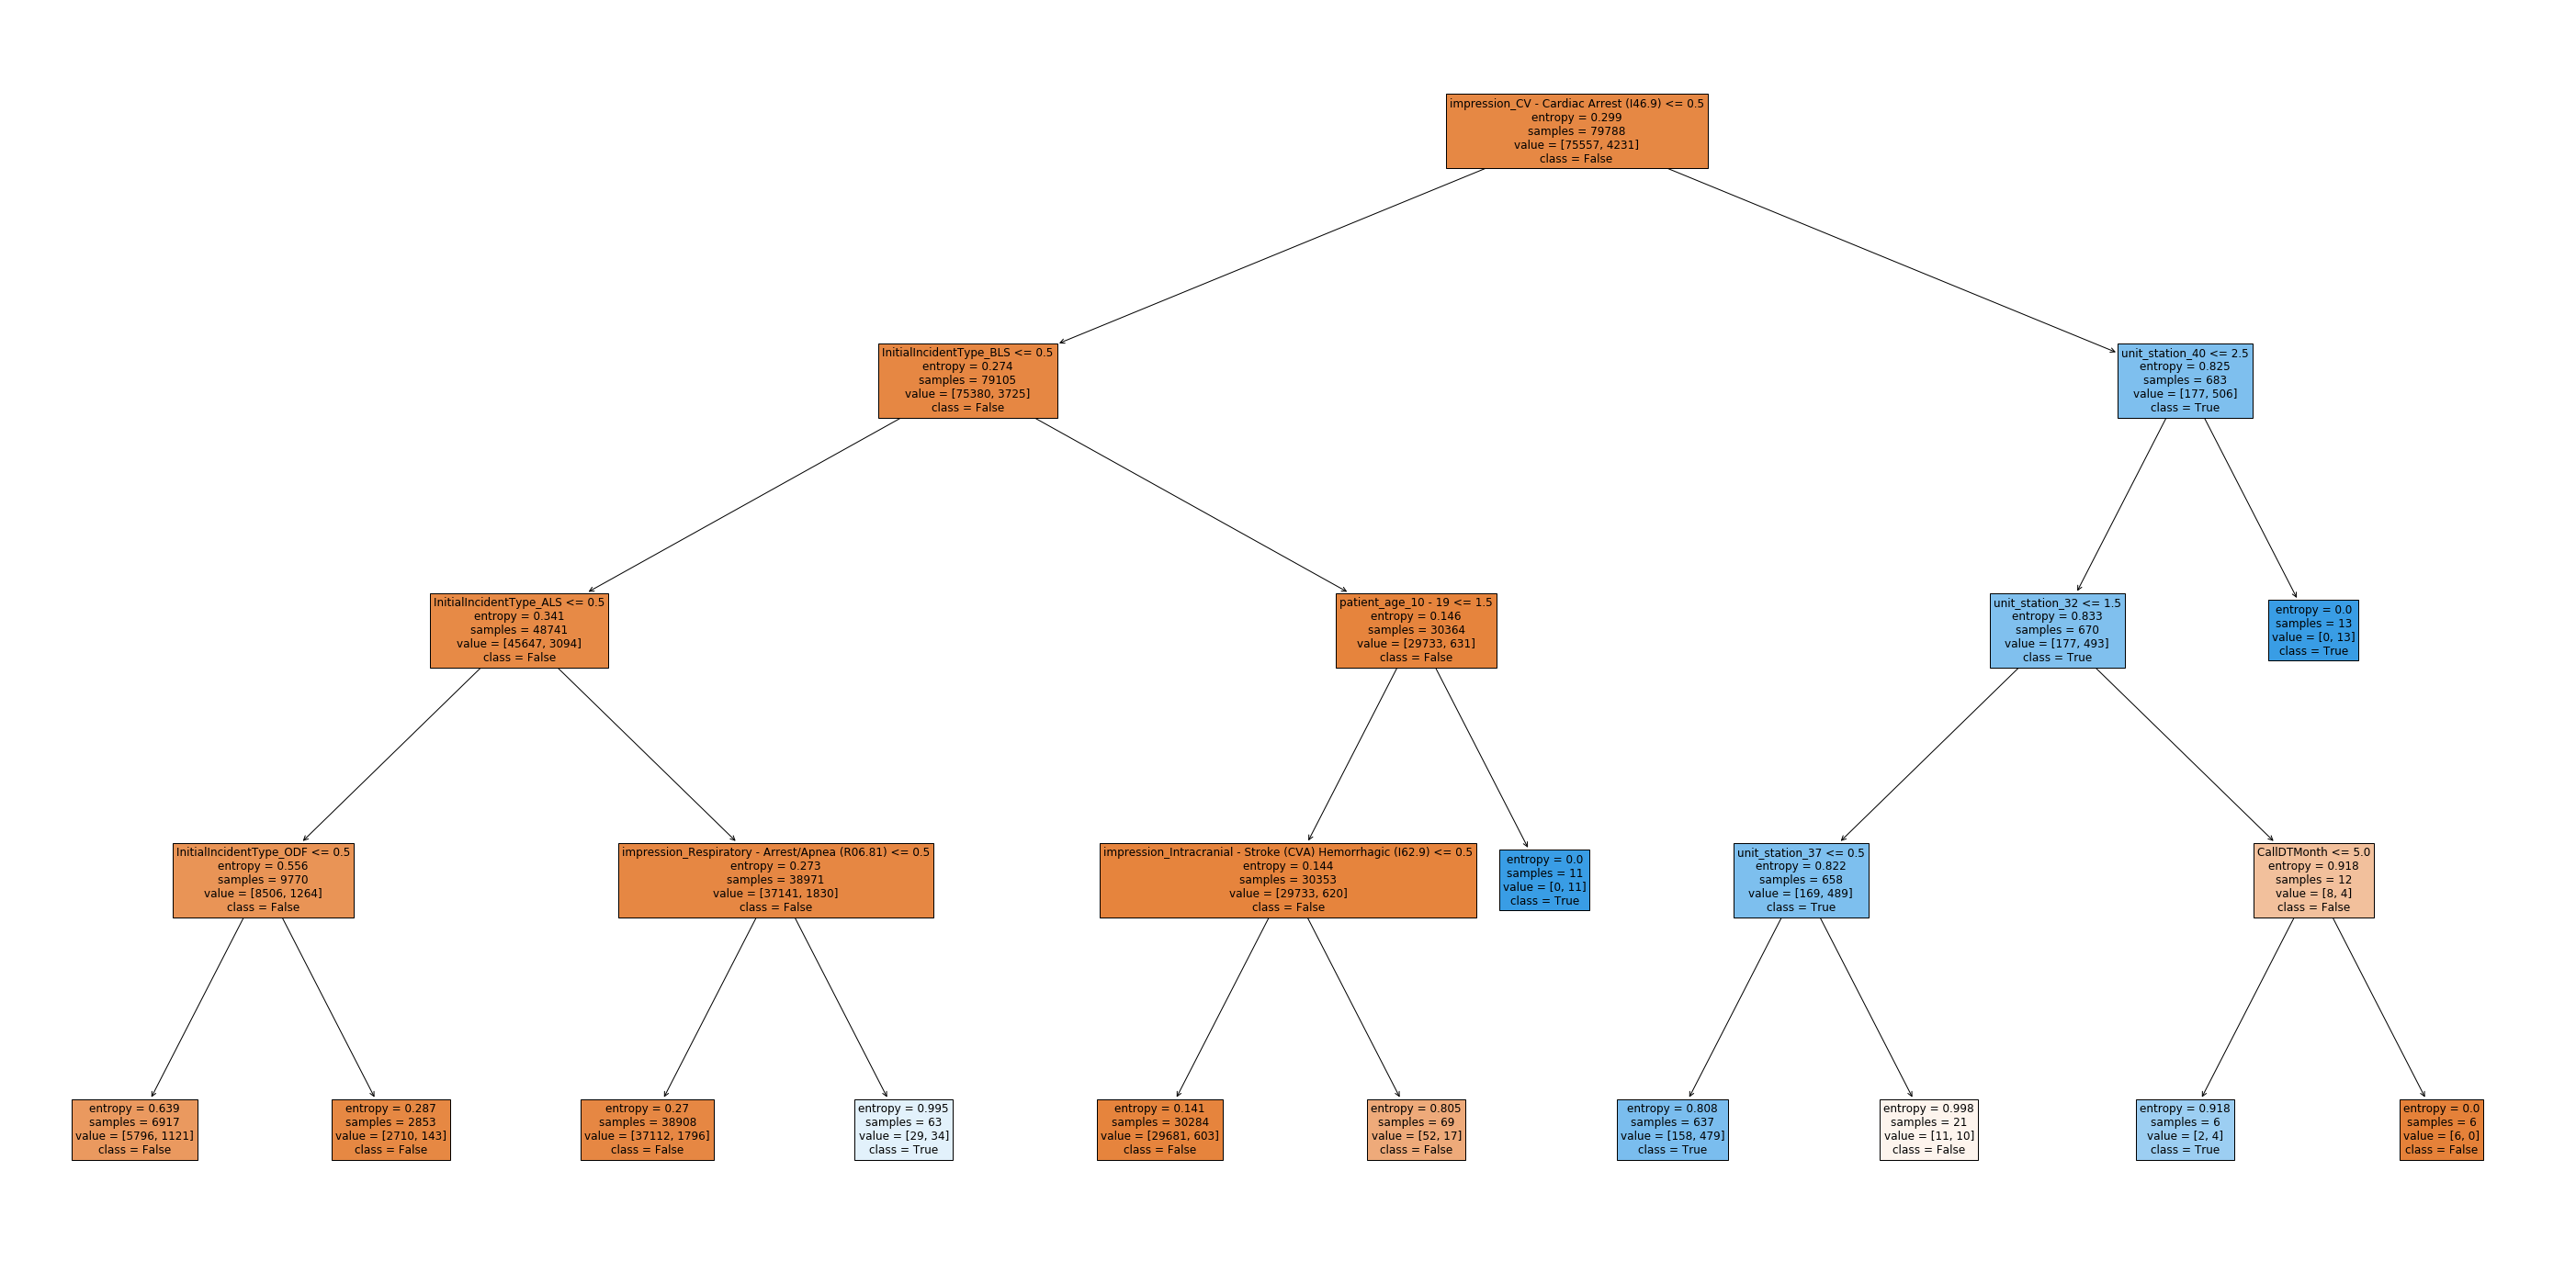

In [29]:
from sklearn.model_selection import train_test_split
x = df[name]
y = df['is_SecondProvider2']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3,random_state=112)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=112, splitter='best')
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_data,predictions)*100)
from sklearn import tree
from sklearn.tree import export_text
text_representation=tree.export_text(model,feature_names=name)
print(text_representation)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50, 25))
tree.plot_tree(model,feature_names=name,class_names=['False','True'],fontsize=12,filled=True)
plt.show()

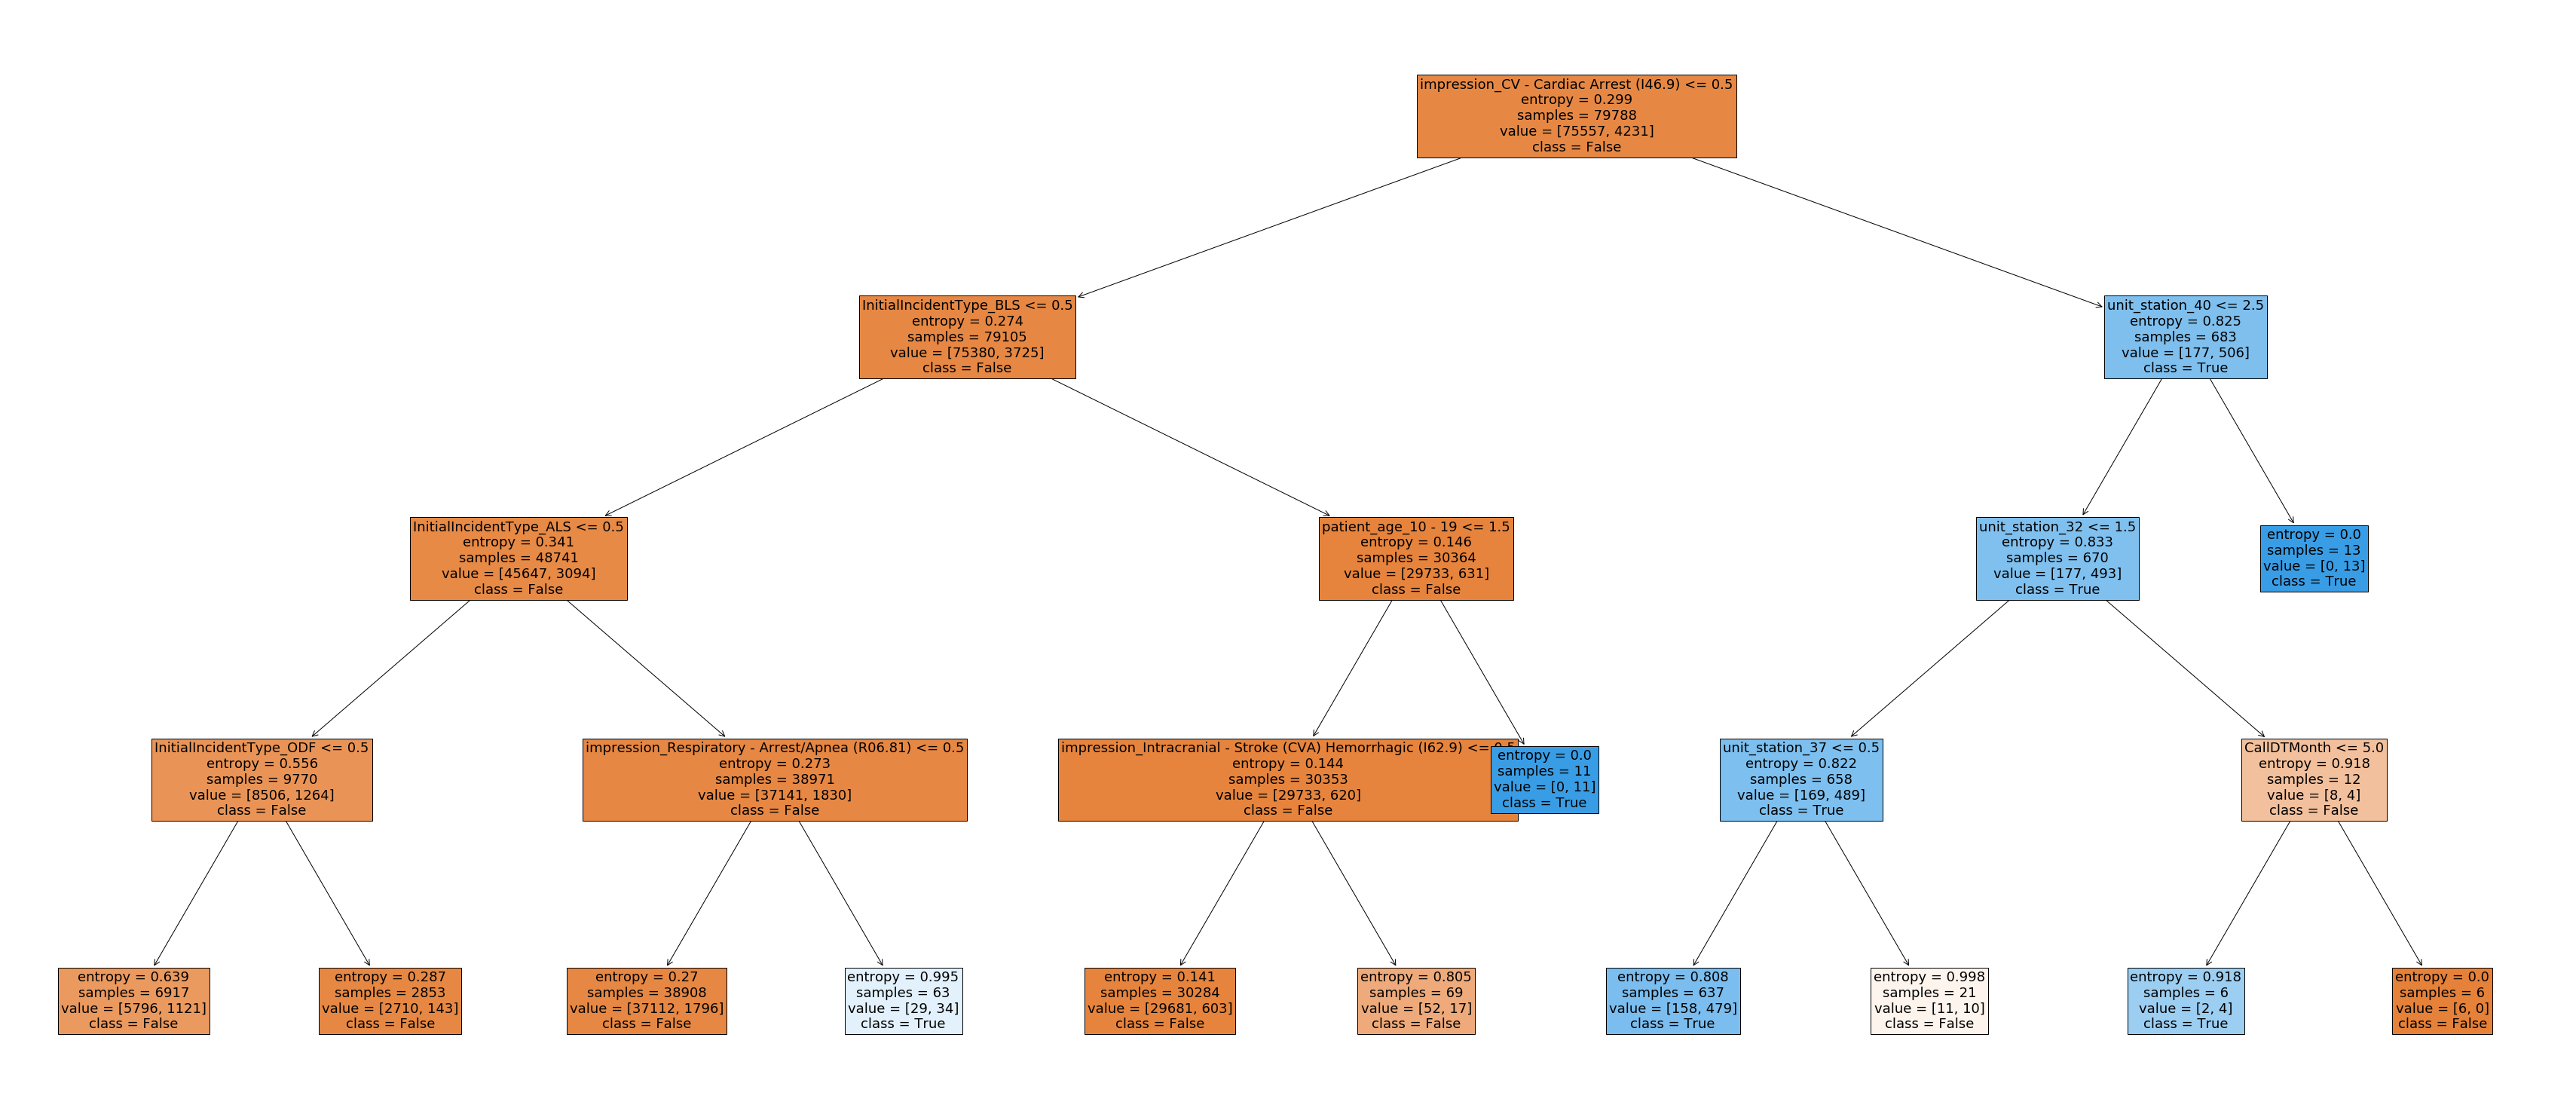

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(61, 27))
tree.plot_tree(model,feature_names=name,class_names=['False','True'],fontsize=18,filled=True)
plt.show()

In [31]:
important = pd.DataFrame({'Feature_names':name,'Importances':model.feature_importances_})

In [32]:
important =important.sort_values(by='Importances', ascending=False).head(15)
important

Feature_names  \
346                           impression_CV - Cardiac Arrest (I46.9)   
57                                           InitialIncidentType_BLS   
53                                           InitialIncidentType_ALS   
84                                           InitialIncidentType_ODF   
196                   impression_Respiratory - Arrest/Apnea (R06.81)   
137                                              patient_age_10 - 19   
376       impression_Intracranial - Stroke (CVA) Hemorrhagic (I62.9)   
126                                                  unit_station_32   
133                                                  unit_station_40   
1                                                        CallDTMonth   
130                                                  unit_station_37   
252                        impression_Infectious - Pneumonia (J18.9)   
256  impression_Environment - Effects of Air or Water Pressure (T70)   
255                   impression_Neuro - Headache - Migraine (G43.9)   
244                      impression_GI/GU - Vaginal Bleeding (N93.9)   

     Importances  
346     0.511325  
57      0.191996  
53      0.170115  
84      0.059182  
196     0.028049  
137     0.019260  
376     0.013033  
126     0.001953  
133     0.001778  
1       0.001722  
130     0.001587  
252     0.000000  
256     0.000000  
255     0.000000  
244     0.000000

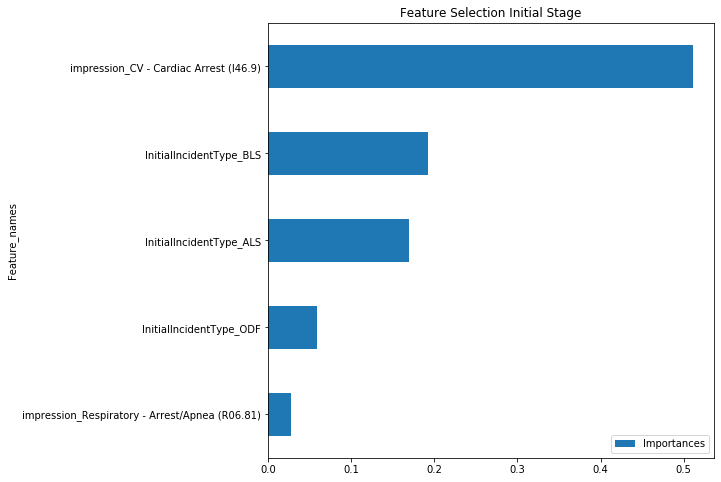

In [52]:
important.head(5).plot.barh(x='Feature_names',y='Importances',rot=0,figsize=(8,8),
                            title='Feature Selection Initial Stage',fontsize=10).invert_yaxis()

# Mike

In [34]:
mike_df=df[df['Count # of PatientID']==1]
mike_df

Unnamed: 0   PrimaryKey CallDTMonth CallDTHour CallDTDayofWeek  \
0            8662  10004310006           9          9               0   
1            8663  10004170002           9          9               0   
2            8664  10004220071           9          9               0   
3            8665  10004240080           9          9               0   
4            8666  10004100081           9          9               0   
...           ...          ...         ...        ...             ...   
113979     122644  12354409006          12         23               3   
113980     122645     12359015          12         23               3   
113981     122646  12354219030          12         23               3   
113982     122647  12354449085          12         23               3   
113983     122648  12354229090          12         23               3   

       IncidentFirstDue_401.0 IncidentFirstDue_402.0 IncidentFirstDue_403.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
113979                      0                      0                      0   
113980                      0                      0                      0   
113981                      0                      0                      0   
113982                      0                      0                      0   
113983                      0                      0                      0   

       IncidentFirstDue_404.0 IncidentFirstDue_405.0 IncidentFirstDue_408.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   
...                       ...                    ...                    ...   
113979                      0                      0                      0   
113980                      0                      0                      0   
113981                      0                      0                      0   
113982                      0                      0                      0   
113983                      0                      0                      0   

       IncidentFirstDue_409.0 IncidentFirstDue_410.0 IncidentFirstDue_411.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      1                      0   
...                       ...                    ...                    ...   
113979                      0                      0                      0   
113980                      0                      0                      0   
113981                      0                      0                      0   
113982                      0                      0                      0   
113983                      0                      0                      0   

       IncidentFirstDue_412.0 IncidentFirstDue_413.0 IncidentFirstDue_414.0  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                 

In [35]:
col_name=list(mike_df.columns)
col_name

['Unnamed: 0',
 'PrimaryKey',
 'CallDTMonth',
 'CallDTHour',
 'CallDTDayofWeek',
 'IncidentFirstDue_401.0',
 'IncidentFirstDue_402.0',
 'IncidentFirstDue_403.0',
 'IncidentFirstDue_404.0',
 'IncidentFirstDue_405.0',
 'IncidentFirstDue_408.0',
 'IncidentFirstDue_409.0',
 'IncidentFirstDue_410.0',
 'IncidentFirstDue_411.0',
 'IncidentFirstDue_412.0',
 'IncidentFirstDue_413.0',
 'IncidentFirstDue_414.0',
 'IncidentFirstDue_415.0',
 'IncidentFirstDue_416.0',
 'IncidentFirstDue_417.0',
 'IncidentFirstDue_418.0',
 'IncidentFirstDue_419.0',
 'IncidentFirstDue_420.0',
 'IncidentFirstDue_421.0',
 'IncidentFirstDue_422.0',
 'IncidentFirstDue_423.0',
 'IncidentFirstDue_424.0',
 'IncidentFirstDue_425.0',
 'IncidentFirstDue_426.0',
 'IncidentFirstDue_427.0',
 'IncidentFirstDue_428.0',
 'IncidentFirstDue_429.0',
 'IncidentFirstDue_430.0',
 'IncidentFirstDue_431.0',
 'IncidentFirstDue_432.0',
 'IncidentFirstDue_433.0',
 'IncidentFirstDue_434.0',
 'IncidentFirstDue_435.0',
 'IncidentFirstDue_436.0',
 

In [36]:
col_name = [e for e in col_name if e not in ('Unnamed: 0','transloc_Level 1: 3 or More Providers (ALS Care)', 'transloc_Level 2: 2 Providers (ALS Care)',
                                    'transloc_Level 3: 1 Provider (ALS Care)',
                                    'transloc_Level 4: 1 Provider (BLS Care)',
                                    'transloc_No Transport LOC',
                                    'Count # of PatientID',
                                    'IncidentFirstDue',
                                    'is_SecondProvider',
                                    'is_SecondProvider2',
                                            'PrimaryKey')]

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     32171
         1.0       0.71      0.16      0.26      1467

    accuracy                           0.96     33638
   macro avg       0.83      0.58      0.62     33638
weighted avg       0.95      0.96      0.95     33638

[[32075    96]
 [ 1236   231]]
96.04019263927701
|--- procedure_IO Start - Intraosseous Access <= 0.50
|   |--- procedure_IV Start - Extremity Vein (arm or leg) <= 0.50
|   |   |--- isALS_LOC <= 0.50
|   |   |   |--- unit_action_Transport person <= 1.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- unit_action_Transport person >  1.50
|   |   |   |   |--- class: 0.0
|   |   |--- isALS_LOC >  0.50
|   |   |   |--- medication_Midazolam (Versed) <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- medication_Midazolam (Versed) >  0.50
|   |   |   |   |--- class: 0.0
|   |--- procedure_IV Start - Extremity Vein (arm or leg) >  0.50
|   |   |--- reason_Specialty 

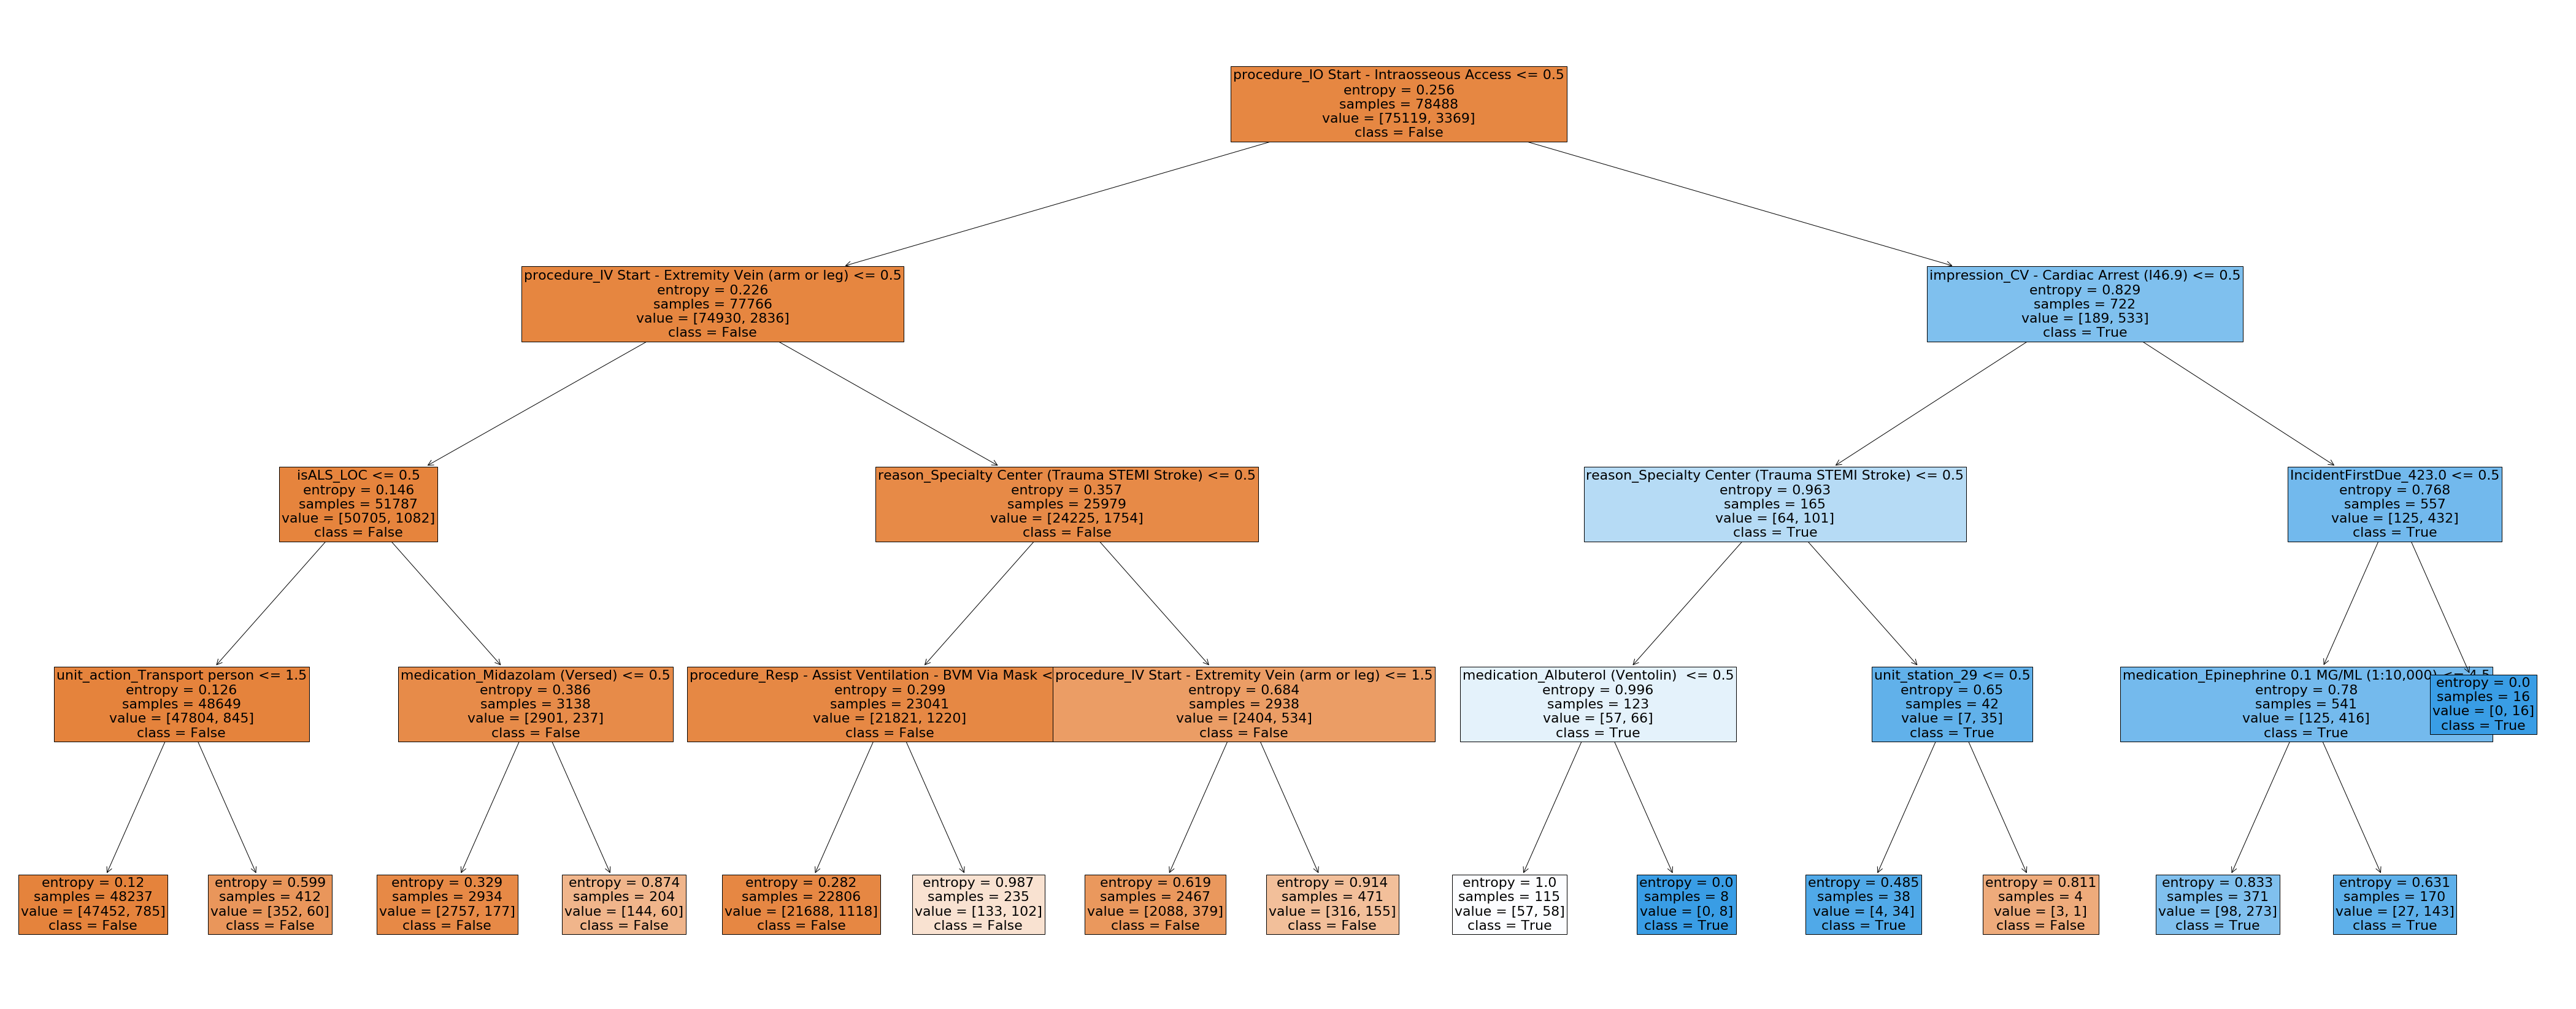

In [37]:
from sklearn.model_selection import train_test_split
x = mike_df[col_name]
y = mike_df['is_SecondProvider2']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3,random_state=112)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=112, splitter='best')
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_data,predictions)*100)
from sklearn import tree
from sklearn.tree import export_text
text_representation=tree.export_text(model,feature_names=col_name)
print(text_representation)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(75, 30))
tree.plot_tree(model,feature_names=col_name,class_names=['False','True'],fontsize=22,filled=True)
plt.show()

In [38]:
mike_important = pd.DataFrame({'Feature_names':col_name,'Importances':model.feature_importances_})

In [39]:
mike_important=mike_important.sort_values(by='Importances', ascending=False).head(15)
mike_important

Feature_names  Importances
719                  procedure_IO Start - Intraosseous Access     0.511678
722          procedure_IV Start - Extremity Vein (arm or leg)     0.207899
429             reason_Specialty Center (Trauma STEMI Stroke)     0.102399
781                                                 isALS_LOC     0.059888
737        procedure_Resp - Assist Ventilation - BVM Via Mask     0.058352
285                              unit_action_Transport person     0.031213
770                             medication_Midazolam (Versed)     0.018674
650                    impression_CV - Cardiac Arrest (I46.9)     0.003245
751                          medication_Albuterol (Ventolin)      0.002035
23                                     IncidentFirstDue_423.0     0.001611
340                                           unit_station_29     0.001515
760               medication_Epinephrine 0.1 MG/ML (1:10,000)     0.001491
528  impression_Endocrine - Hyperglycemia - Diabetic (E13.65)     0.000000
522       impression_Abuse of Alcohol - Intoxication (F10.92)     0.000000
517              impression_Burn - Unspecified Degree (T30.0)     0.000000

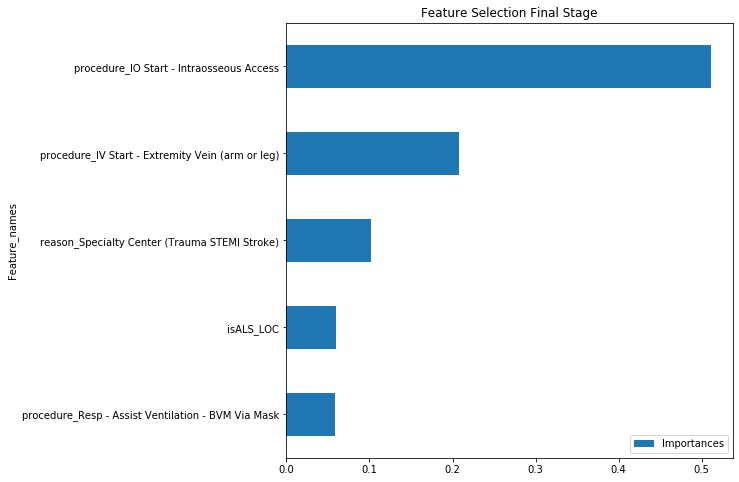

In [51]:
mike_important.head(5).plot.barh(x='Feature_names',y='Importances',rot=0,figsize=(8,8),
                                title='Feature Selection Final Stage').invert_yaxis()